In [117]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg
from scipy.stats import norm
import seaborn as sns

I've decided to do all of my GIS in a separate program. I am going to be creating my boxplots with pandas.

In [26]:
cholera = pd.read_csv('choleraData.csv', skiprows = 1)
cholera

#Cleaned data for using streets
choleraClean = pd.read_csv('Cleaned_Cholera_Data.csv')
choleraClean

,Name of Street,No. of House,No. of Deaths.,Whether opposite Air Shaft.,Whether opposite untrapped Gully.,Condition of Dust Bin,"Description of Drainage, whether Brick or Pipe, and condition thereof.","Whether any Cesspools, and Number.",Remarks
0,Poland Street,6.0,2.0,No,No,Good,Brick and pipe drains,Yes,"A cesspool exists, but the drains seem good."
1,Poland Street,9.0,1.0,No,Yes,Good,"Brick drains, good",Uncertain,No knowledge of cesspool being destroyed
2,Poland Street,11.0,2.0,No,No,Good,Not ascertainable,Uncertain,No knowledge of cesspool being destroyed; prob...
3,Poland Street,14.0,1.0,No,No,Good,Not ascertainable,Uncertain,No knowledge of cesspool being destroyed.
4,Poland Street,19.0,1.0,No,No,Good,Not ascertainable,Uncertain,No knowledge of cesspool being destroyed.
...,...,...,...,...,...,...,...,...,...
209,Wardour Street,87.0,1.0,No,No,Good,Not ascertainable,Yes,Probably old brick drains.
210,Wardour Street,89.0,1.0,No,No,Good,"Brick drains, repaired 6 months ago",No,Brick drains appear in good condition.
211,Wardour Street,91.0,1.0,No,No,Good,Brick drains,Uncertain,Drains appear to be in good condition; no know...
212,Wardour Street,93.0,1.0,No,No,Good,"Pipe drains, 3 years old",No,Drainage effective.


In [11]:
#cholera['Description of Drainage, whether Brick or Pipe, and condition thereof.'].unique()

#There are way too many unique values to plot this.

Whether any Cesspools, and Number.
No           1.371429
Uncertain    1.646552
Yes          2.222222
Name: No. of Deaths., dtype: float64

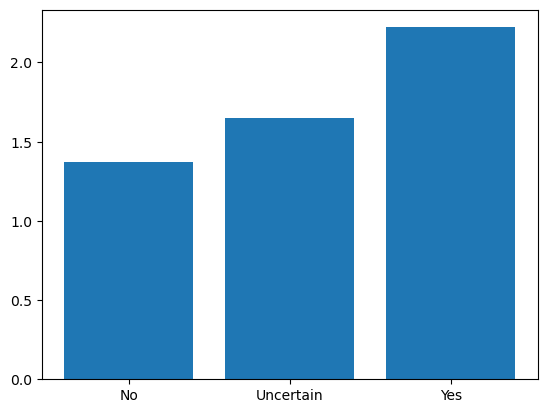

In [12]:
grouped = cholera.groupby('Whether any Cesspools, and Number.')['No. of Deaths.'].mean().dropna()

fig, ax = plt.subplots()
ax.bar(grouped.index, grouped.values)
grouped

Whether opposite Air Shaft.
Near    1.500000
No      1.598958
Yes     1.684211
Name: No. of Deaths., dtype: float64

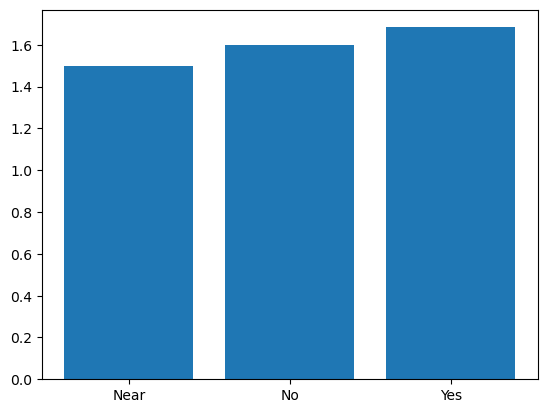

In [16]:
grouped = cholera.groupby('Whether opposite Air Shaft.')['No. of Deaths.'].mean().dropna()

fig, ax = plt.subplots()
ax.bar(grouped.index, grouped.values)
grouped

In [111]:
#Grouping by name of street and no of deaths
grouped = choleraClean.groupby('Name of Street')['No. of Deaths.'].sum().dropna().reset_index()

#grouped.to_excel("groupedStreets.xlsx", index=False)
grouped


,Name of Street,No. of Deaths.
0,Bentinck Street,9.0
1,Berwick Street,31.0
2,Brewer Street,4.0
3,Bridle Lane,3.0
4,Broad Street,55.0
5,Cambridge Street,12.0
6,Carnaby Street,15.0
7,Cross Court,2.0
8,Cross Street,6.0
9,Duck Lane,2.0


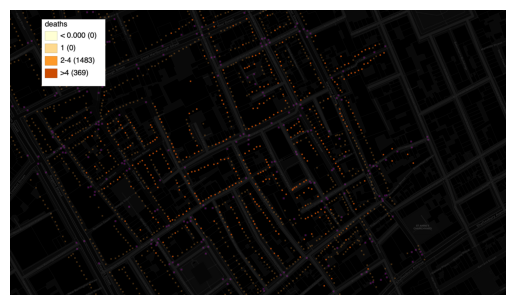

In [48]:
img = mpimg.imread("/Users/jules/Documents/GitHub/Cholera-GIS-Analysis/broadst.png")
plt.imshow(img)
plt.axis('off')  # optional: hides the axes
plt.show()

In [ ]:
#There are deaths clustered around broad st, I am supposed to prove that the miasmas are causing death, not the pumps
#I'm going to group by Broad St. to see the conditions of the other factors.

broadSt = choleraClean[choleraClean['Name of Street'] == 'Broad Street']

noCesspools = choleraClean[
    (choleraClean['Whether any Cesspools, and Number.'] == 'No') &
    (choleraClean['Name of Street'] == 'Broad Street')
]

cesspools = choleraClean[
    (choleraClean['Whether any Cesspools, and Number.'] == 'Yes') &
    (choleraClean['Name of Street'] == 'Broad Street')
]

cesspoolsUncertain = choleraClean[
    (choleraClean['Whether any Cesspools, and Number.'] == 'Uncertain') &
    (choleraClean['Name of Street'] == 'Broad Street')
]
remarks = cesspools['Remarks'] 
print(f'Remarks of houses containing cesspools on Broad St. {remarks}')


Remarks of houses containing cesspools on Broad St. 16                                                                                -
19    The drainage is good in house, but there is a large cesspool in shop at back.
36                                              Offensive cesspool, and bad drains.
Name: Remarks, dtype: object


,Name of Street,No. of House,No. of Deaths.,Whether opposite Air Shaft.,Whether opposite untrapped Gully.,Condition of Dust Bin,"Description of Drainage, whether Brick or Pipe, and condition thereof.","Whether any Cesspools, and Number.",Remarks
10,Broad Street,3.0,5.0,No,No,Good,Not ascertainable,Uncertain,No knowledge of cesspool being destroyed.
11,Broad Street,4.0,3.0,No,No,Good,Brick drains,Uncertain,No knowledge of cesspool being destroyed.
12,Broad Street,5.0,2.0,No,No,Good,Not ascertainable,Uncertain,No knowledge of cesspool being destroyed.
13,Broad Street,10.0,1.0,No,No,Good,"Old brick drains, partly trapped",Uncertain,No knowledge of cesspool being destroyed.
15,Broad Street,12.0,3.0,No,No,Good,Not ascertainable,Uncertain,No knowledge of cesspool being destroyed.
21,Broad Street,26.0,1.0,No,No,Good,Not ascertainable,Uncertain,Probably brick; no knowledge of cesspool being destroyed; drains seem to be new
23,Broad Street,31.0,2.0,No,No,Good,Not ascertainable,Uncertain,Probably old brick drains; No knowledge of cesspool being destroyed.
25,Broad Street,33.0,2.0,No,No,Good,Brick drain,Uncertain,Bad smells; brick drains; no knowledge of cesspool being destroyed.
27,Broad Street,37.0,3.0,No,No,Good,Not ascertainable,Uncertain,Probably brick; No knowledge of cesspool being destroyed.
28,Broad Street,38.0,1.0,No,No,Good,Not ascertainable,Uncertain,Probably brick; No knowledge of cesspool being destroyed.


In [114]:
#Now doing with a different street with a lot of deaths
berwick = choleraClean[choleraClean['Name of Street'] == 'Berwick Street']

noCesspools = choleraClean[
    (choleraClean['Whether any Cesspools, and Number.'] == 'No') &
    (choleraClean['Name of Street'] == 'Berwick Street')
]

cesspools = choleraClean[
    (choleraClean['Whether any Cesspools, and Number.'] == 'Yes') &
    (choleraClean['Name of Street'] == 'Berwick Street')
]

uncertain = choleraClean[
    (choleraClean['Whether any Cesspools, and Number.'] == 'Uncertain') &
    (choleraClean['Name of Street'] == 'Berwick Street')
]
remarks = cesspools['Remarks'] 
print(f'Remarks of houses containing cesspools on Berwick St. {remarks}')

uncertain

Remarks of houses containing cesspools on Berwick St. 74    Cesspool and drains bad and offensive.
Name: Remarks, dtype: object


,Name of Street,No. of House,No. of Deaths.,Whether opposite Air Shaft.,Whether opposite untrapped Gully.,Condition of Dust Bin,"Description of Drainage, whether Brick or Pipe, and condition thereof.","Whether any Cesspools, and Number.",Remarks
58,Berwick Street,4.0,1.0,No,Yes,Good,Not ascertainable,Uncertain,Probably old brick drains; No knowledge of cesspool being destroyed.
59,Berwick Street,5.0,2.0,No,Yes,Good,Not ascertainable,Uncertain,Probably old brick drains; No knowledge of cesspool being destroyed.
60,Berwick Street,6.0,1.0,No,No,Good,Not ascertainable,Uncertain,Probably old brick drains; No knowledge of cesspool being destroyed.
62,Berwick Street,10.0,2.0,No,No,Good,Brick drains,Uncertain,No knowledge of cesspool being destroyed.
63,Berwick Street,12.0,1.0,No,No,Good,-,Uncertain,Refused admittance.
64,Berwick Street,13.0,2.0,No,No,Good,Not ascertainable,Uncertain,Probably old brick drain; No knowledge of cesspool being destroyed.
68,Berwick Street,32.0,1.0,No,No,Good,Not ascertainable,Uncertain,Probably old brick drains; No knowledge of cesspool being destroyed.
69,Berwick Street,33.0,1.0,No,No,Good,Not ascertainable,Uncertain,Probably old brick drains; No knowledge of cesspool being destroyed.
71,Berwick Street,49.0,1.0,No,No,Good,Not ascertainable,Uncertain,Probably old brick drains; No knowledge of cesspool being destroyed.
72,Berwick Street,71.0,1.0,No,No,Good,Not ascertainable,Uncertain,Probably old brick drains; No knowledge of cesspool being destroyed.
